# chOO.시각화

## seaborn
* ref : https://seaborn.pydata.org/examples/index.html
* ref : https://scikit-learn.org/stable/datasets/toy_dataset.html
* 시각화 기능(Matplotlib) + 통계(Statsmodels) 기반으로 다양한 색상과 통계용 차트 등의 기능을 추가한 패키지

In [1]:
# ! pip install seaborn

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
sns.set()

In [3]:
plt.rcParams['font.family'] = 'NanumGothic'

In [4]:
%matplotlib inline   
#cell  magic

In [5]:
# user = pd.read_csv("./lec13_pandas_quiz/dataset/user.csv")
# score = pd.read_csv("./lec13_pandas_quiz/dataset/score.csv")
# df = pd.merge(user, score, how='inner' , on='sno')
# df.head()

df = sns.load_dataset("penguins")
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [6]:
pivot = df.pivot_table(index='sex', columns='body_mass_g', values='bill_length_mm')
pivot

body_mass_g,2700.0,2850.0,2900.0,2925.0,3000.0,3050.0,3075.0,3100.0,3150.0,3175.0,...,5600.0,5650.0,5700.0,5750.0,5800.0,5850.0,5950.0,6000.0,6050.0,6300.0
sex,,,,,,,,,,,,,,,,,,,,,
Female,46.9,36.45,37.35,37.9,37.15,35.55,37.7,36.0,36.575,36.85,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,53.35,50.533333,49.92,50.4,49.05,50.933333,47.5,49.95,59.6,49.2


## Regression

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


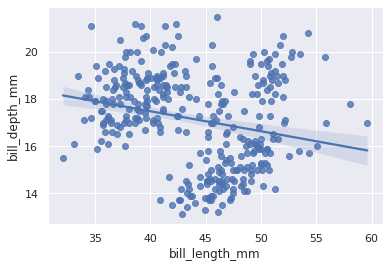

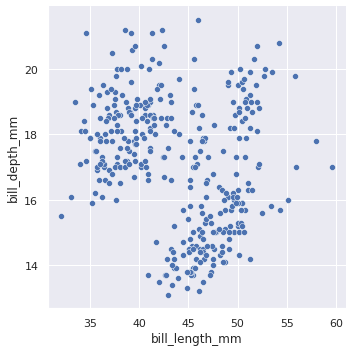

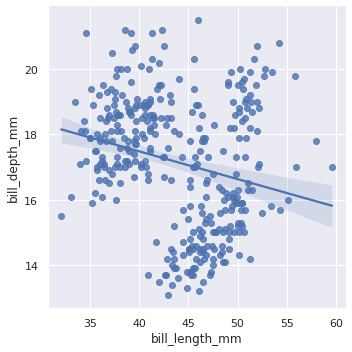

In [7]:
sns.regplot(data=df, x="bill_length_mm", y="bill_depth_mm") # 회귀선 추가
sns.relplot(data=df, x="bill_length_mm", y="bill_depth_mm" )  #column간 선형관계 확인
sns.lmplot(data=df,  x="bill_length_mm", y="bill_depth_mm")   # relplot + 선


## Categorical

<pre>
# kind로 종류 지정                                              # kind 없이도 직접 써서 가능
sns.catplot(data=df, x="obj컬럼", y="int컬럼", kind="bar")      sns.barplot(data=df, x="species")
sns.catplot(data=df, x="obj컬럼", y="int컬럼", kind="count")    sns.countplot(data=df, x="species")
sns.catplot(data=df, x="obj컬럼", y="int컬럼", kind="box")      sns.boxplot(data=df, x="species", y="flipper_length_mm")
sns.catplot(data=df, x="obj컬럼", y="int컬럼", kind="violin")   sns.violinplot(x=df.species, y=df.flipper_length_mm)          # 분포도
                                                               sns.histplot(data=df, x="flipper_length_mm", hue="species")   # ,col="species"
                                                               sns.kdeplot (data=df, x="flipper_length_mm", hue="species")   #hist보다 부드려운 곡선
                                                               sns.displot (data=df, x="flipper_length_mm", hue="species")   #matplotlib.hist + kdeplot
                                                               sns.relplot (data=df, x="bill_length_mm", y="bill_depth_mm")
sns.catplot(data=df, x="species", y="bill_length_mm")          sns.scatterplot(data=df, x="flipper_length_mm", y="bill_length_mm")
                                                                
                                                               sns.heatmap(df.corr(), annot=True)
                                                               sns.lineplot(data=df, x="flipper_length_mm", y="bill_length_mm")     
                                                               sns.pairplot(df)                                                   # hist + scatter / 하지마
                                                               sns.jointplot(data=df, x="flipper_length_mm", y="bill_length_mm")  # hist + scatter / 하지마
f, axs = plt.subplots(1, 2, figsize=(9, 4)) # 이건 matplot이랑 같다
sns.scatterplot(data=df, x="flipper_length_mm", y="bill_length_mm", ax=axs[0]) # matplot에서는 axs[0]. 이렇게 들어갔었다. / seaborn은 무조건 앞에 sns.들어가야돼서 뒤로 들어감
sns.scatterplot(data=df, x="flipper_length_mm", y="bill_length_mm", ax=axs[1])


### Bar chart

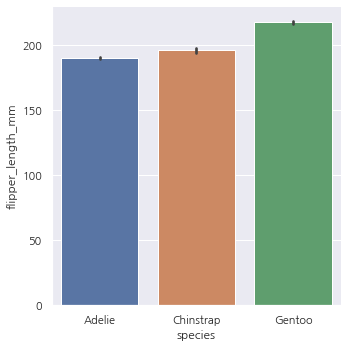

In [197]:
sns.catplot(data=df, x="species", y="flipper_length_mm", kind="bar")

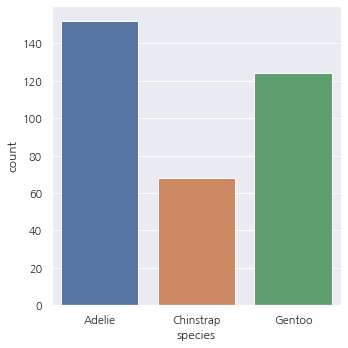

In [195]:
sns.catplot(data=df, x="species", kind="count")

<AxesSubplot:xlabel='species', ylabel='count'>

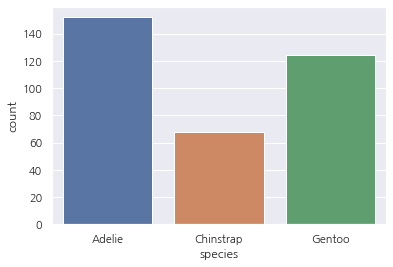

In [211]:
sns.countplot(data=df, x="species") # count라 y없어도 됨

### boxplot

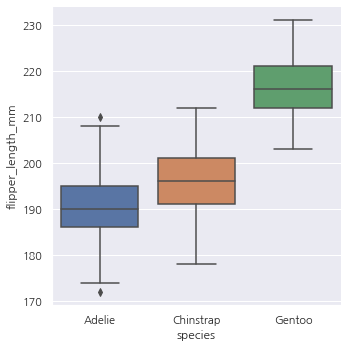

In [201]:
sns.catplot(data=df, x="species", y="flipper_length_mm", kind="box")

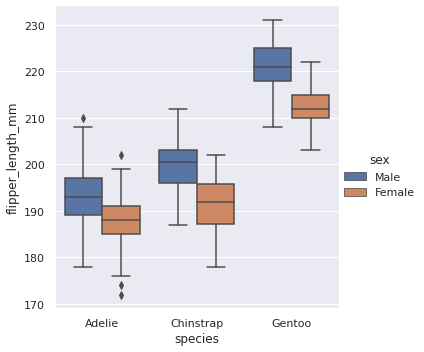

In [9]:
sns.catplot(data=df, x="species", y="flipper_length_mm", hue="sex", kind="box") # hue: sex별로 나눠준다 / 남자별 여자별 나눠서 그리는 건 밑에

<AxesSubplot:xlabel='species', ylabel='flipper_length_mm'>

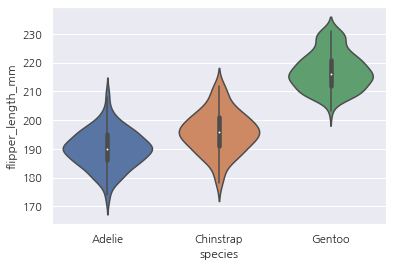

In [207]:
sns.violinplot(x=df.species, y=df.flipper_length_mm) # 바이올린 분포 확인하기 좋다. # df.뭐시깽이 가능한데 버전마다 안 되기도

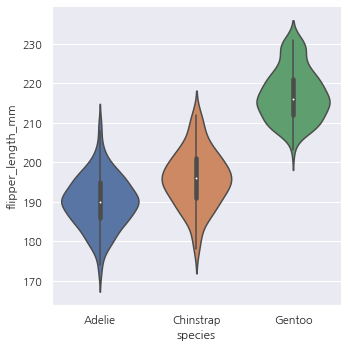

In [210]:
sns.catplot(data=df, x="species", y="flipper_length_mm", kind="violin")

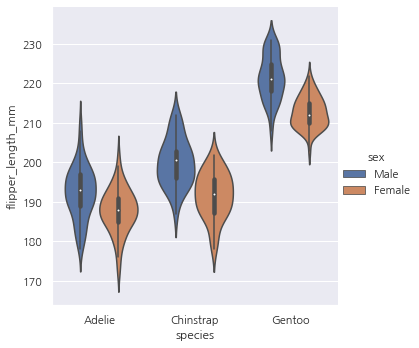

In [205]:
sns.catplot(data=df, x="species", y="flipper_length_mm", hue="sex", kind="violin")

### histogram
*  도수분포표 : x축(계급), y축(도수,갯수)

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Count'>

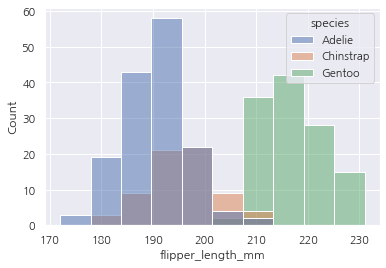

In [138]:
sns.histplot(data=df, x="flipper_length_mm", hue="species")

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Density'>

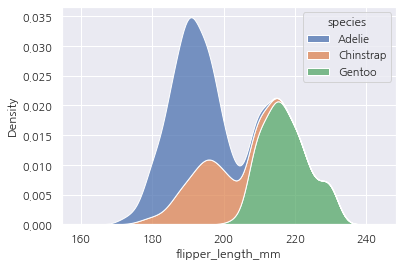

In [139]:
sns.kdeplot(data=df, x="flipper_length_mm", hue="species", multiple="stack")

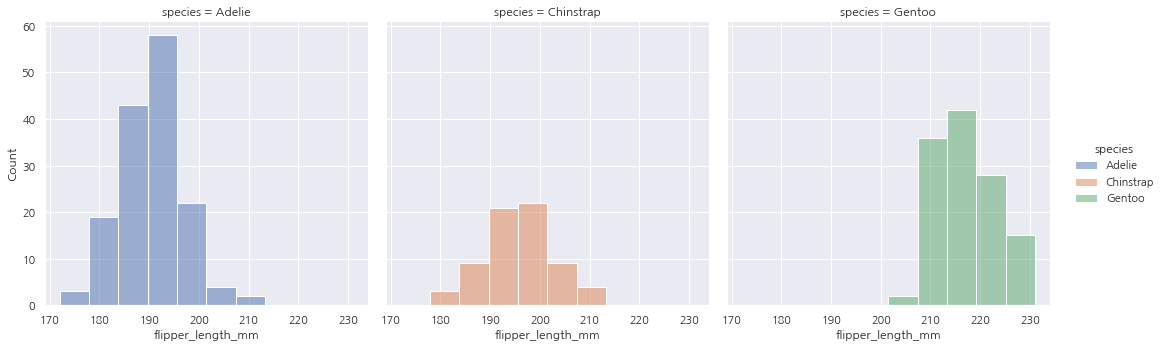

In [141]:
sns.displot(data=df, x="flipper_length_mm", hue="species", col="species") # species별로 나눠서 그린다. : hue하면 종별로 col하면 나눠서

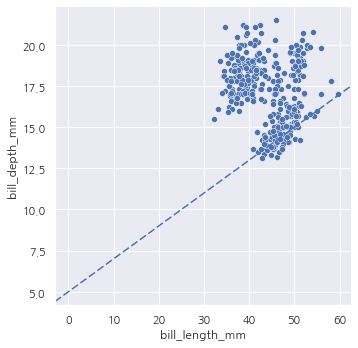

In [151]:
g = sns.relplot(data=df, x="bill_length_mm", y="bill_depth_mm") # 회귀선
g.ax.axline(xy1=(0, 5), slope=.2, color="b", dashes=(5, 2))

### heatmap

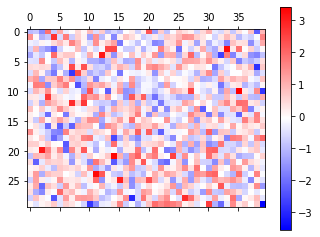

In [12]:
arr = np.random.standard_normal((30, 40))

plt.matshow(arr, cmap='bwr')  #BuGn
plt.colorbar()
plt.show() # matplot은 이런식인데 seaborn은 sns.뭐시기 하면 된다.

### scatter

<AxesSubplot:xlabel='flipper_length_mm', ylabel='bill_length_mm'>

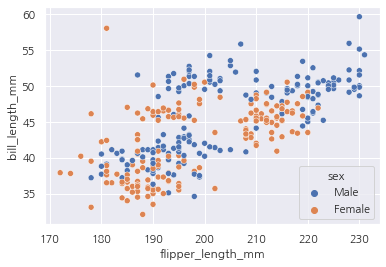

In [181]:
sns.scatterplot(data=df, x="flipper_length_mm", y="bill_length_mm", hue="sex")


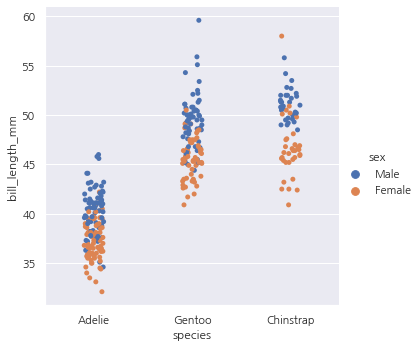

In [186]:
#sns.catplot(x="species", y="flipper_length_mm", data=df)
sns.catplot(data=df, x="species", y="bill_length_mm", hue="sex", order=['Adelie', 'Gentoo', 'Chinstrap'],) # 종류별로 나눠서 그림(카테고리성인 경우)

## 여러 개의 그래프 그리기

### subplot()

<img src="https://wikidocs.net/images/page/141537/subplot_03.png" width=700>

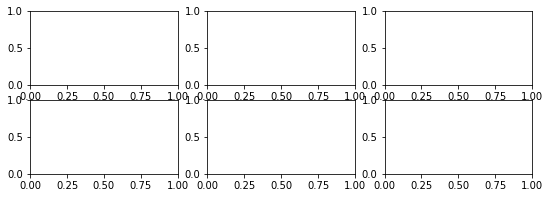

In [16]:
fig, axs = plt.subplots(2, 3, figsize=(9, 3)) 

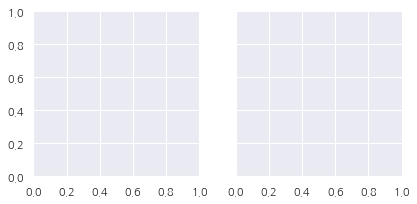

In [152]:
g = sns.FacetGrid(df, col="sex") # 굳이 seaborn걸로쓰고 싶으면......

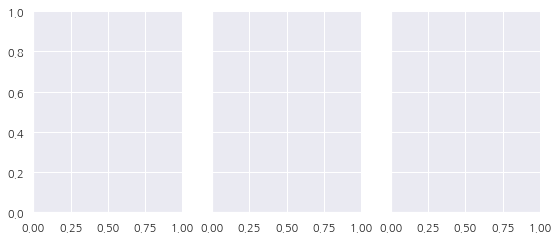

In [157]:
g = sns.FacetGrid(df, col="species", height=3.5, aspect=.75)

#### (방법1) subplot 1개에 2개 차트 그려보기
* plt.subplots(1, 4, figsize=(16, 3)) 

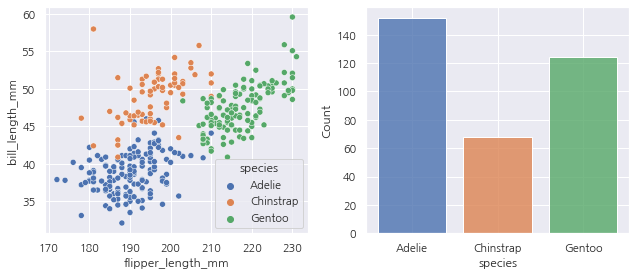

In [163]:
f, axs = plt.subplots(1, 2, figsize=(9, 4))
sns.scatterplot(data=df, x="flipper_length_mm", y="bill_length_mm", hue="species", ax=axs[0])
sns.histplot(data=df, x="species", hue="species", shrink=.8, alpha=.8, legend=False, ax=axs[1])
f.tight_layout()

#### (방법2) 2개 차트 결합(Combining)

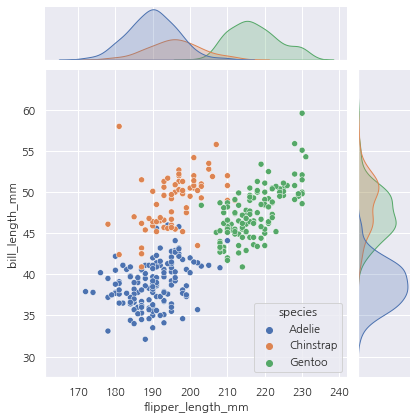

In [167]:
sns.jointplot(data=df, x="flipper_length_mm", y="bill_length_mm", hue="species")

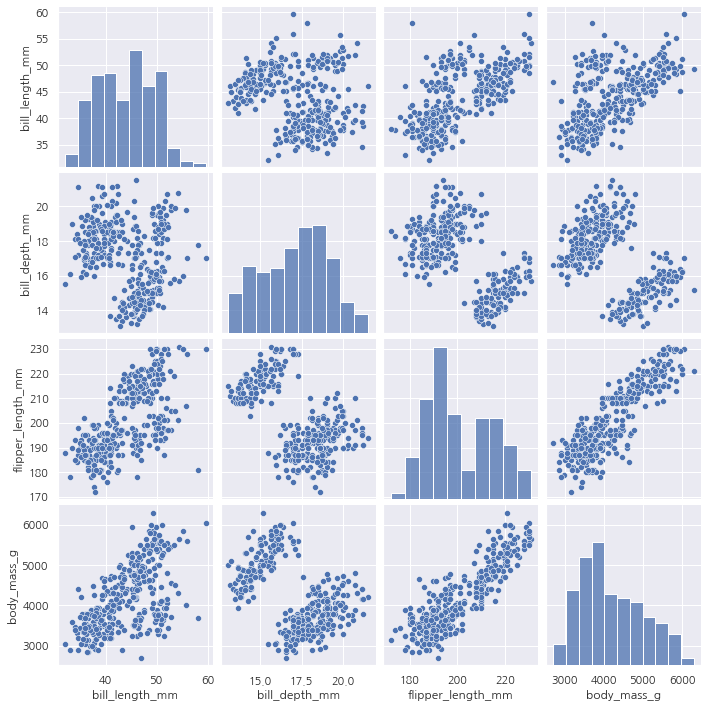

In [168]:
sns.pairplot(df) # 본인 거는 히스토그램으로 다른 애랑은 산점도로 그린다 / 데이터 많아지면 컴퓨터 죽는다.

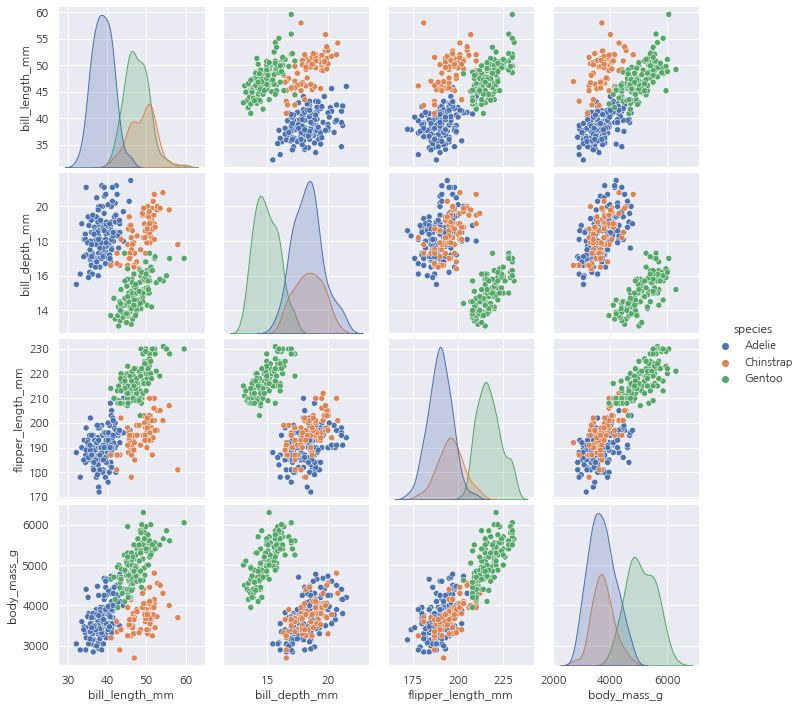

In [170]:
sns.pairplot(df, hue="species") # 컴퓨터 죽는다.

#### (방법2) subplot 4개에 차트 그려보기
* 이전방법 : plt.subplots(1, 4, figsize=(16, 3))
* 편한방법 : myfig, myax = plt.subplots(1, 4, figsize=(16, 3))

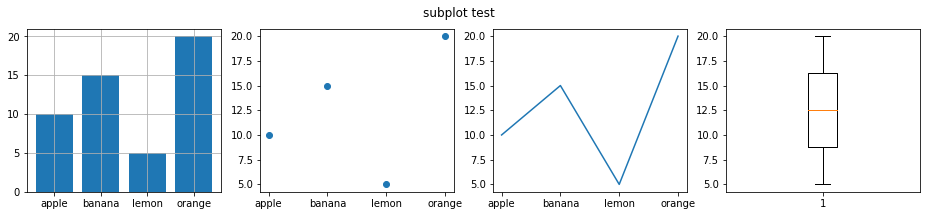

In [18]:
myall, my = plt.subplots(1, 4, figsize=(16, 3))    # 1행 4열 그래프를 16:3비율 크기로 그리기

my[0].bar(df['name'], df['cnt'])
my[1].scatter(df['name'], df['cnt'])
my[2].plot(df['name'], df['cnt'])
my[3].boxplot(df['cnt'])

my[0].grid()
myall.suptitle('subplot test')

plt.show()

#### (방법3) subplot 2개에 차트 그려보기
* 첫번째 subplot :  라인차트(plot) 2개 그리기
* 두번째 subplot :  라인차트(plot) 1개 그리기

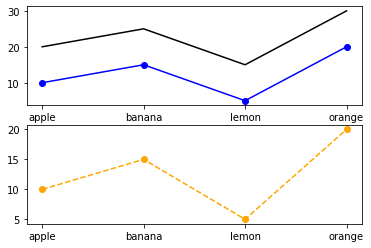

In [19]:
# plt.subplot(2,1,1)
plt.subplot(211)
plt.plot(df['name'], df['cnt']+10  , color='black')
plt.plot(df['name'], df['cnt']     , color='blue'    , marker='o')

# plt.subplot(2,1,2)
plt.subplot(212)
plt.plot(df['name'], df['cnt']     , color='orange' , marker='o' , linestyle='--')
plt.show()

#### subplot 2개에 Pie 차트 그려보기

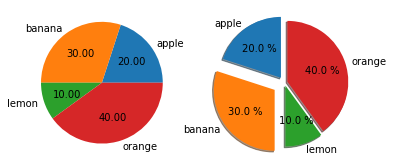

In [20]:
myfig, myax = plt.subplots(1, 2)
myax[0].pie(df['cnt'], labels=df['name'], autopct='%.2f')
myax[1].pie(df['cnt'], labels=df['name'], explode=[0.1, 0.2, 0.05, 0.05], autopct='%.1f %%', shadow=True, startangle=90)
plt.show()


### twinx() : y축이 좌,우 2개

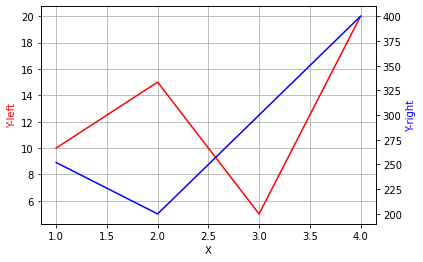

In [21]:

# Create some mock data
xdata  = [1,2,3,4]
ydata1 = [10,15,5,20]
ydata2 = [252,200,300,400]

myfig, myax = plt.subplots()
# -------------------------------------공통
myax.set_xlabel('X')
myax.grid()
# -------------------------------------왼쪽
myax.set_ylabel('Y-left' , color='red')
myax.plot(xdata, ydata1  , color='red')
# -------------------------------------오른쪽
myax_cp = myax.twinx()  #-------------- 왼쪽 y축  오른쪽으로 복제
myax_cp.set_ylabel('Y-right', color='blue') 
myax_cp.plot(xdata, ydata2  , color='blue')

plt.show()

## 차트 이미지로 저장하기

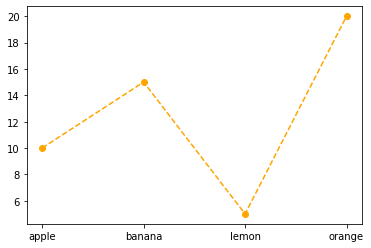

In [22]:
plt.plot(df['name'], df['cnt']     , color='orange' , marker='o' , linestyle='--')
plt.savefig('./lec15_chart_save.jpg')

## 저장한 차트이미지 불러오기

In [23]:
# ! pip install pillow
# ! pip install matplotlib

### (방법1) jupyter인 경우 마크다운에 &lt;HTML&gt;  사용
* &lt;img src='./lec15_chart_save.jpg' width='300' height='150'&gt; 

<img src='./lec15_chart_save.jpg' width='300' height='150'>

### (방법2) matplotlib 패키기 imshow() 사용

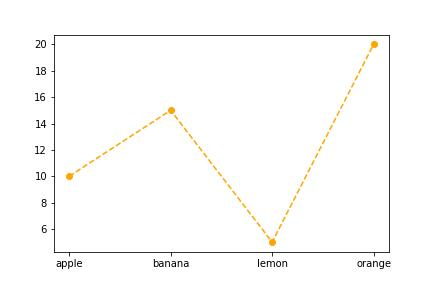

In [24]:
from matplotlib.pyplot import imshow
from PIL import Image

myimg = Image.open('./lec15_chart_save.jpg', 'r')
# plt.imshow(myimg)
# imshow(myimg)
# display(myimg)
myimg

### (방법3) pillow 패키지 display() 이용하기

In [25]:
from PIL import Image
myimg = Image.open('./lec15_chart_save.jpg')     #----------- 열기
print(myimg.size)                                #----------- 크기   
myimg.thumbnail(  (300, 75)  )                   #----------- 크기 변경
myimg.save('./lec15_chart_save222.jpg')          #----------- 저장

(432, 288)


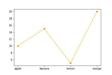

In [26]:
myimg = Image.open('./lec15_chart_save222.jpg')  #----------- 보기
display(myimg)
# myimg.show()  -------------------- jupyter가 멈춤.. 실행하지말것